In [129]:
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

In [131]:
img_dir = '/home/q/CompVision/mask-rcnn.pytorch/data/phone/images/train'
json_file = '/home/q/Desktop/pytorch_semseg/instances_phone_train_test.json'
raw_annot =  '/home/q/Desktop/pytorch_semseg/cocoset/annot'
gt_annot = '/home/q/Desktop/pytorch_semseg/cocoset/gt'

In [167]:
files = os.listdir(img_dir)
index = np.random.randint(0, len(files))
img_name = files[index]
print(img_name, index)

cp14_lightness_0.5.jpg 922


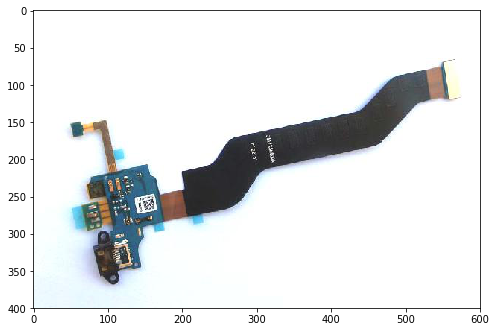

In [168]:
img = io.imread(img_dir + '/' + img_name)
plt.imshow(img); plt.show()

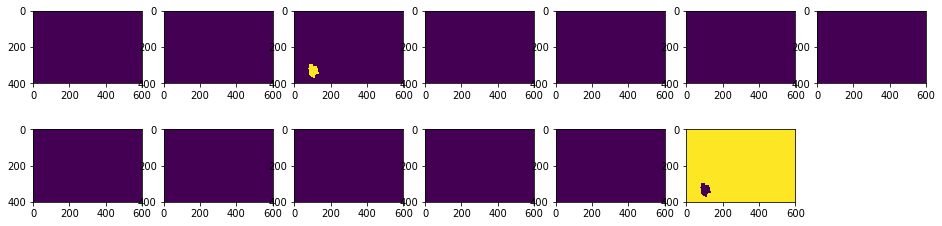

In [169]:
bi_mask = np.load(raw_annot + '/' + img_name[:-3] + 'npy')
fig = plt.figure(figsize=(16,4))
for i in range(13):
    mask = bi_mask[:,:,i]
    fig.add_subplot(2, 7, i+1)
    plt.imshow(mask)
plt.show()

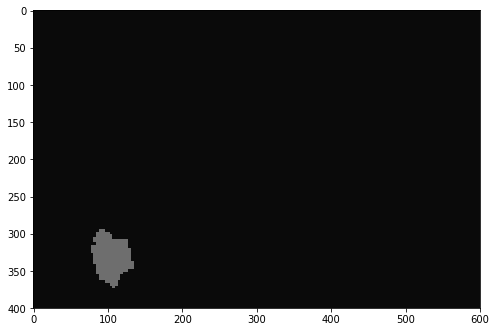

array([ 10, 110], dtype=uint8)

In [170]:
gt = io.imread(gt_annot + '/' + img_name[:-3] + 'png')
plt.imshow(gt); plt.show()
np.unique(gt)

2


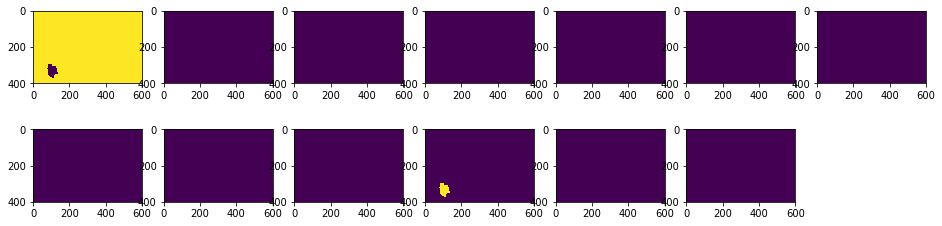

In [171]:
fig = plt.figure(figsize=(16,4))
print(len(np.unique(gt[:,:,0])))
for i in range(13):
    gt_mask = np.zeros(gt[:,:,0].shape)
    gt_mask[gt[:,:,0]==(i+1)*10] = 1 
    fig.add_subplot(2, 7, i+1)
    plt.imshow(gt_mask)
plt.show()

In [229]:
gt_json_file = '/home/q/CompVision/mask-rcnn.pytorch/data/phone/annotations/instances_phone_val.json'
# res_json_file = '/home/q/CompVision/mask-rcnn.pytorch/Outputs/e2e_mask_rcnn_R-50-FPN_1x_test/Aug16-01-28-29_q_step/test/segmentations_phone_val_results.json'
img_dir = '/home/q/CompVision/mask-rcnn.pytorch/data/phone/images/val/'

In [266]:
CLASSES =  ["motherboard", "battery", "charging port",
            "motor", "cover", "back cover", "screen",
            "cable", "camera", "screw", "connector"]

In [230]:
gt_coco = COCO(gt_json_file)
# res_coco = COCO(res_json_file)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [231]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
motherboard battery charging_port motor cover back_cover screen cable camera screw connector

Custom COCO supercategories: 
component


In [225]:
category_ids = example_coco.getCatIds(catNms=['screw'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
image_data

{'id': 3515,
 'file_name': 'iphone4slayer2.jpg',
 'width': 600,
 'height': 400,
 'date_captured': '2018-08-14 22:40:47.191502',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

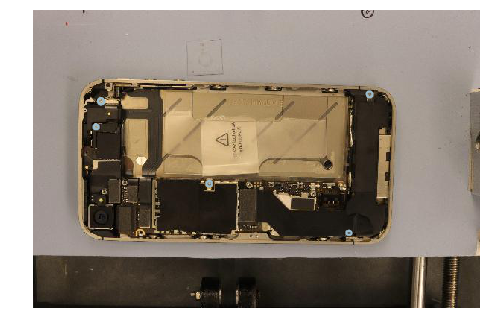

In [226]:
# load and display instance annotations
# image = io.imread(coco_img_dir + image_data['file_name'])
image = io.imread(img_dir + '/' + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

samsung_s4_activelayer4_GBlurred_2.jpg
['motherboard', 'motor', 'cover', 'cable', 'camera', 'screw', 'connector']


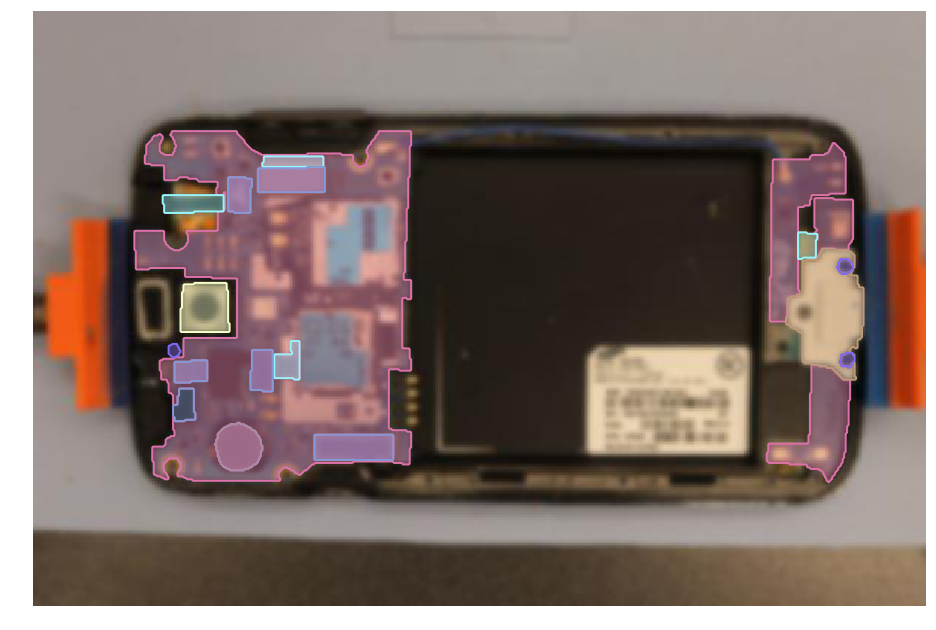

In [280]:
image_data = gt_coco.loadImgs(74)[0]
print(image_data['file_name'])
image = io.imread(img_dir + '/' + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (16.0, 20.0)
annotation_ids = gt_coco.getAnnIds(imgIds=image_data['id'], iscrowd=None)
annotations = gt_coco.loadAnns(annotation_ids)
print([CLASSES[annot['category_id']-1] for annot in annotations])
example_coco.showAnns(annotations)